<h3> Example of a Generator Model (GANs) </h3>

<h5> Developing a generator model requires upsampling a vector from the latent space with 100 dimensions to
a 2D array with 28×28 or 784 values. </h5>

<h4> Import libraries </h4>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU

Using TensorFlow backend.


<h4> Defining generator function </h4>

In [2]:
def generator(latent_dim=100):
    model = Sequential()
    n_nodes = 128*7*7 #128 feature maps, 7x7 filter
    model.add(Dense(n_nodes,input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7,7,128)))
    
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2D(1,(7,7),activation='sigmoid',padding='same'))
    
    return model

<h4> Model summary </h4>

In [3]:
model = generator()

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 28, 28, 128)      

In [7]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

InvocationException: GraphViz's executables not found

<h3> Example of Discriminator Model </h3>

In [6]:
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import Adam
def discriminator(in_shape=(28,28,1)):
    model = Sequential()
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [7]:
model = discriminator()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [8]:
from keras.datasets.mnist import load_data

(x_train,y_train),(x_test,y_test)=load_data()
print('Train shape',x_train.shape,y_train.shape)
print('Test Shape',x_test.shape,y_test.shape)

Train shape (60000, 28, 28) (60000,)
Test Shape (10000, 28, 28) (10000,)


In [9]:
import matplotlib.pyplot as plt

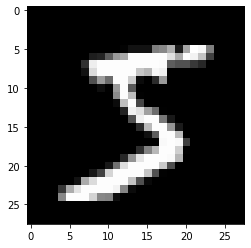

In [10]:
plt.imshow(x_train[0],cmap='gray')